## **Task**

### 4) Building a Decision Tree in Python

#### 4a) Importing the Essentials

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

#### 4b) Loading the Dataset

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
# Load the data into a pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
# Preview the data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### 4c) Splitting Data into Training and Test Sets

In [ ]:
X = df.drop('species', axis=1)
y = df['species']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


In [ ]:
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [ ]:
y_train.head()

,species
81,1
133,2
137,2
75,1
109,2


In [ ]:
y_test.head()

,species
73,1
18,0
118,2
78,1
76,1


#### 4d) Training the Decision Tree Model

In [ ]:
# Initialize the model
clf = DecisionTreeClassifier(max_depth=3)
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

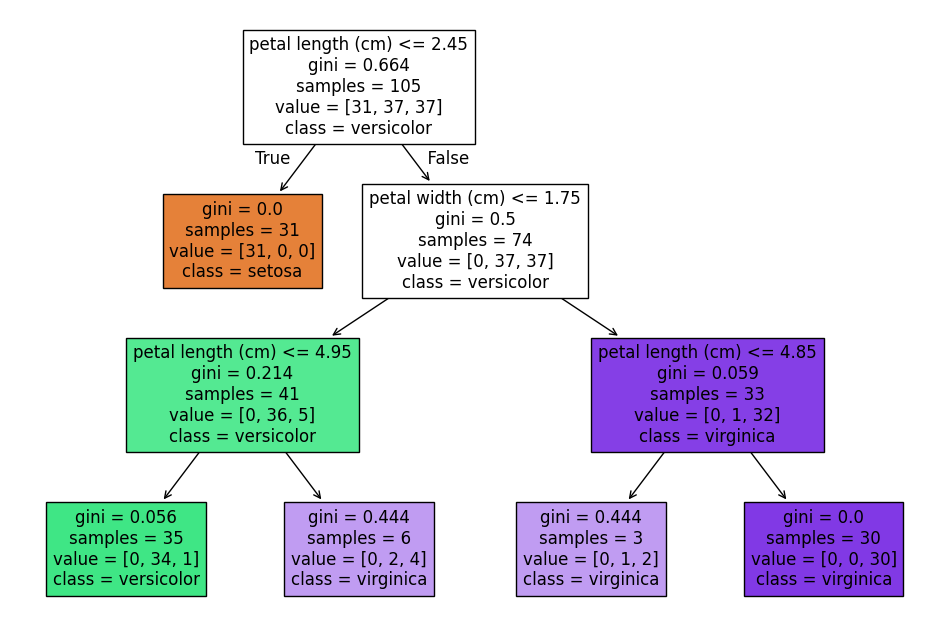

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

#### 4e) Making Predictions

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)
# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


#### 4f) Interpreting the Tree

Let's walk through the decision-making process for this decision tree step by step. Each node represents a decision based on a feature, and each leaf node gives the final class prediction.

##### Root Node:
1. **Feature: "petal width (cm)" <= 0.8**
   - **Gini Impurity:** 0.664 (This measures how "impure" or "mixed" the class labels are at this point. Lower values are better, indicating purer groups.)
   - **Samples:** 105 (The total number of data points at this node.)
   - **Class Distribution:** [31, 37, 37] (This means there are 31 samples of Setosa, 37 of Versicolor, and 37 of Virginica.)
   - **Prediction:** Versicolor (The class with the highest number of samples at this node is chosen as the predicted class.)
   
   The tree first checks if the petal width is less than or equal to 0.8. This is the most informative feature at the root level based on Gini impurity reduction.

##### Left Branch (True, "petal width (cm)" <= 0.8):
2. **Leaf Node:**
   - **Gini Impurity:** 0.0 (All samples here belong to the same class.)
   - **Samples:** 31 (These samples meet the condition of "petal width <= 0.8".)
   - **Class Distribution:** [31, 0, 0] (All 31 samples are Setosa.)
   - **Prediction:** Setosa

   Since all samples at this point belong to the Setosa class, the tree makes a final prediction of Setosa for this branch. No further splits are required because Gini = 0, indicating pure classification.

##### Right Branch (False, "petal width (cm)" > 0.8):
3. **Feature: "petal width (cm)" <= 1.75**
   - **Gini Impurity:** 0.5
   - **Samples:** 74
   - **Class Distribution:** [0, 37, 37] (All the Setosa samples have been classified, and now we have only Versicolor and Virginica left.)
   - **Prediction:** Versicolor

   The tree now splits again, based on whether the petal width is less than or equal to 1.75. This continues to maximize class separation.

##### Left Branch (True, "petal width (cm)" <= 1.75):
4. **Feature: "petal length (cm)" <= 4.95**
   - **Gini Impurity:** 0.214
   - **Samples:** 41
   - **Class Distribution:** [0, 36, 5] (Mostly Versicolor, with a few Virginica samples.)
   - **Prediction:** Versicolor

   This branch further splits based on the petal length. Most of the samples here are Versicolor, but there are a few Virginica as well.

##### Left Branch (True, "petal length (cm)" <= 4.95):
5. **Leaf Node:**
   - **Gini Impurity:** 0.056
   - **Samples:** 35
   - **Class Distribution:** [0, 34, 1]
   - **Prediction:** Versicolor

   Almost all samples here are Versicolor. Since the Gini impurity is very low (0.056), the tree classifies this branch as Versicolor with high confidence.

##### Right Branch (False, "petal length (cm)" > 4.95):
6. **Leaf Node:**
   - **Gini Impurity:** 0.444
   - **Samples:** 6
   - **Class Distribution:** [0, 2, 4]
   - **Prediction:** Virginica

   This small subset contains both Versicolor and Virginica samples, but the majority are Virginica, so the tree predicts Virginica for this branch.

#### Right Branch (False, "petal width (cm)" > 1.75):
7. **Feature: "petal length (cm)" <= 4.85**
   - **Gini Impurity:** 0.059
   - **Samples:** 33
   - **Class Distribution:** [0, 1, 32]
   - **Prediction:** Virginica

   For samples where petal width is greater than 1.75, the tree further splits on petal length. Most of the samples here are Virginica.

##### Left Branch (True, "petal length (cm)" <= 4.85):
8. **Leaf Node:**
   - **Gini Impurity:** 0.444
   - **Samples:** 3
   - **Class Distribution:** [0, 1, 2]
   - **Prediction:** Virginica

   This small subset contains 2 Virginica samples and 1 Versicolor sample, but since Virginica is the majority, the tree predicts Virginica.

##### Right Branch (False, "petal length (cm)" > 4.85):
9. **Leaf Node:**
   - **Gini Impurity:** 0.0
   - **Samples:** 30
   - **Class Distribution:** [0, 0, 30]
   - **Prediction:** Virginica

   All samples here belong to the Virginica class, so the tree makes a final prediction of Virginica.

---

### Summary:
- The tree starts by splitting on **petal width** because it provides the most significant reduction in Gini impurity.
- If **petal width <= 0.8**, the sample is classified as **Setosa**.
- If **petal width > 0.8**, the tree makes further splits based on **petal width** and **petal length** to classify the sample as either **Versicolor** or **Virginica**.
- Each split is made to maximize purity (reduce Gini impurity), and the predictions at the leaf nodes are based on the majority class at that node.

The decision tree thus breaks the problem down into a series of simple decisions, making it easy to interpret and understand the reasons behind each prediction.

### 5) Overfitting

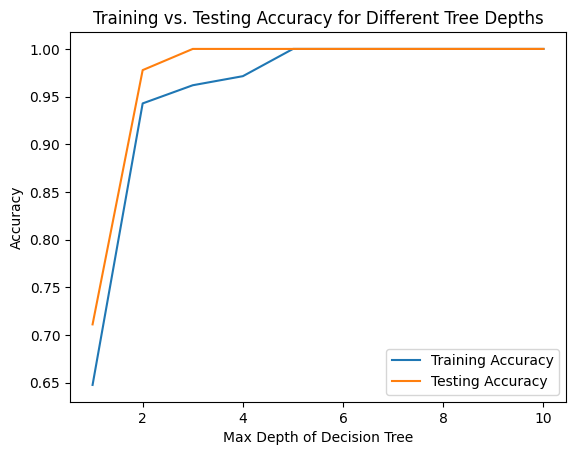

In [ ]:
# Assuming you have already trained your model and have the training and testing accuracy scores
train_accuracy = []
test_accuracy = []
depth_range = range(1, 11)  # You can adjust the depth range

for depth in depth_range:
  # Create and train your decision tree model with current depth
  clf = DecisionTreeClassifier(max_depth=depth)
  clf.fit(X_train, y_train)

  # Predict on training data
  y_train_pred = clf.predict(X_train)
  train_accuracy.append(accuracy_score(y_train, y_train_pred))

  # Predict on testing data
  y_test_pred = clf.predict(X_test)
  test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Plot the training and testing accuracies
plt.plot(depth_range, train_accuracy, label='Training Accuracy')
plt.plot(depth_range, test_accuracy, label='Testing Accuracy')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Training vs. Testing Accuracy for Different Tree Depths')
plt.legend()
plt.show()

### 6) Pruning

#### Pre-pruning

##### Max_depth = 2

In [ ]:
clf = DecisionTreeClassifier(max_depth=2, min_samples_split=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=4)

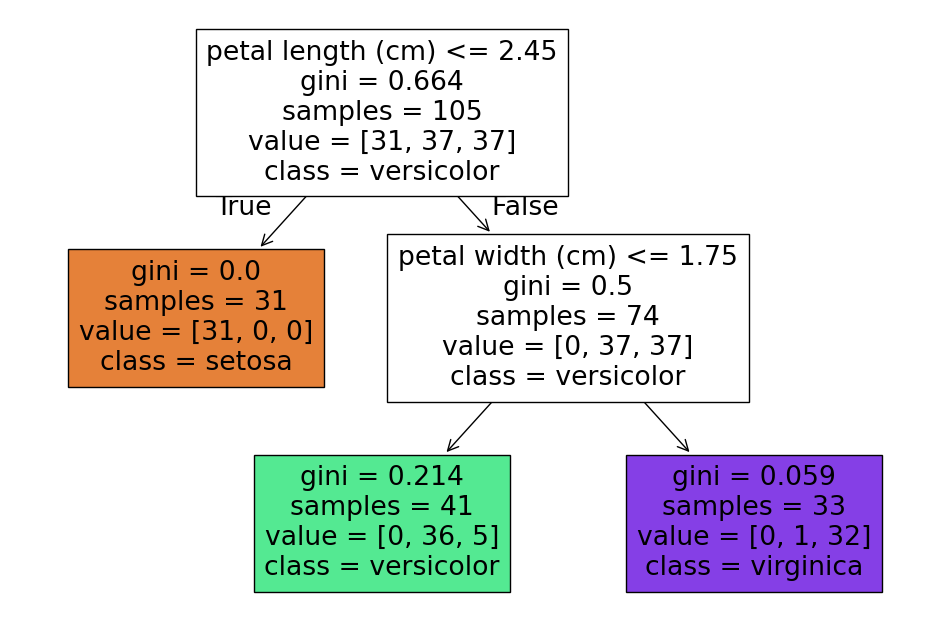

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)
# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


##### Max_depth = 1

In [ ]:
clf = DecisionTreeClassifier(max_depth=1, min_samples_split=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, min_samples_split=4)

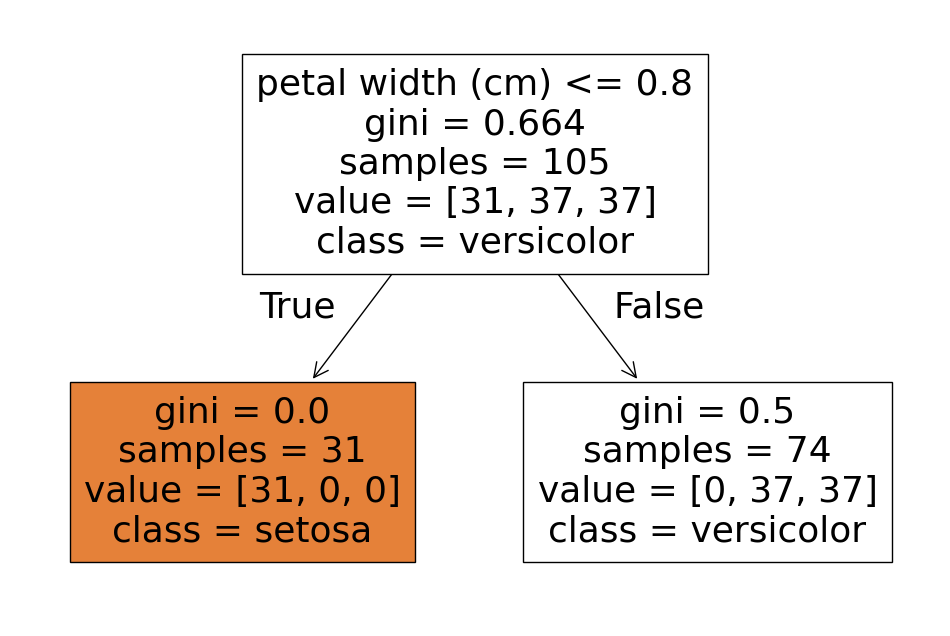

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)
# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 71.11%


##### Max_depth = 4

In [ ]:
clf = DecisionTreeClassifier(max_depth=4, min_samples_split=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=4)

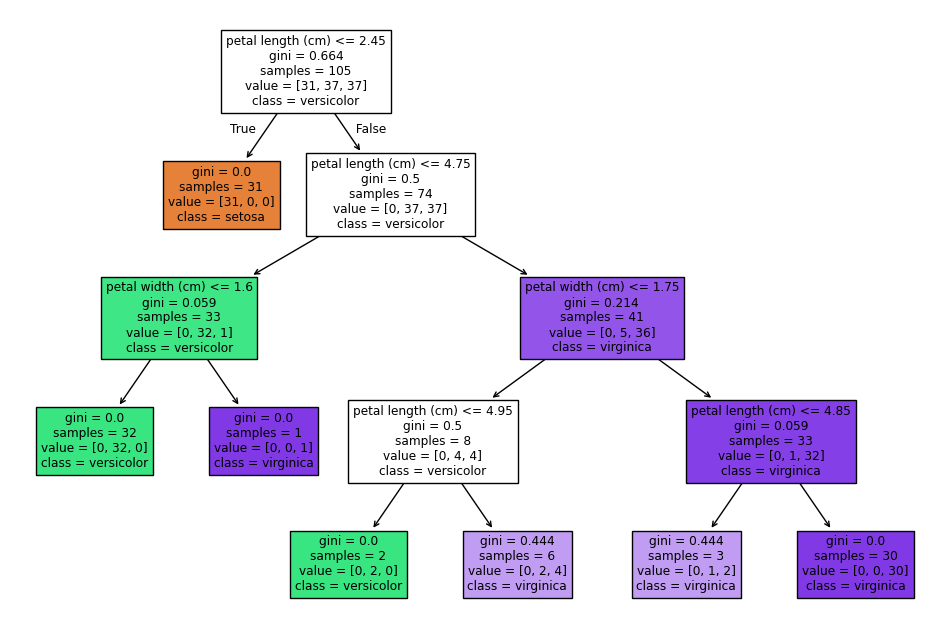

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)
# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


#### Post-pruning

In [ ]:
# Split your data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# allow the tree to grow fully
tree = DecisionTreeClassifier(max_depth= 2, random_state=42)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
# finding the tree according the value of the alpha
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
print(ccp_alphas)

[0.         0.24326537 0.33340278]


In [ ]:
# Train multiple trees using different ccp_alpha values
trees = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    trees.append(clf)

In [ ]:
# Evaluate the trees on the validation set
val_scores = [accuracy_score(y_val, tree.predict(X_val)) for tree in trees]

In [ ]:
# Choose the best tree with highest validation score
best_tree_index = val_scores.index(max(val_scores))
best_tree = trees[best_tree_index]

In [ ]:
# Check the performance of the best tree
print(f"Best ccp_alpha: {ccp_alphas[best_tree_index]}")
print(f"Accuracy on validation set: {val_scores[best_tree_index]}")

Best ccp_alpha: 0.0
Accuracy on validation set: 1.0
